# Data Preparation

## 1. Importing the Modules

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Loading the Dataset

In [2]:
df = pd.read_csv('bank.csv')

## 3. Quick Data Exploration

In [3]:
# Print the last 10 rows of the dataframe
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1990,36.0,technician,married,tertiary,no,376,no,no,cellular,16,sep,173,1,-1,0,NaN,yes
1991,39.0,admin.,divorced,secondary,no,112,no,no,cellular,16,sep,574,3,-1,0,NaN,yes
1992,78.0,retired,divorced,primary,no,527,no,no,cellular,16,sep,193,1,-1,0,NaN,yes
1993,35.0,management,married,NaN,no,2326,yes,yes,cellular,16,sep,319,1,-1,0,NaN,yes
1994,26.0,student,single,secondary,no,655,no,no,cellular,16,sep,190,1,-1,0,NaN,yes
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


### 3.1 Check for missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


We can determine that the `bank.csv` dataset has __2000__ data rows, and it contains __17__ attributes.

The attributes `age`, `job`, `education`, `contact` and `poutcome` have missing values.

In [5]:
# Find the number of nulls in the dataset

df.isnull().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

Alternatively, we can discover missing values in the `bank.csv` dataset by looking at the output of `df.isnull().sum()`.

In [6]:
# Find the number of nulls/NaNs in the dataset

df.isna().sum() 

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

Alternatively, we can discover missing values in the `bank.csv` dataset by looking at the output of `df.isna().sum()`.

### 3.2 Check for duplicates

We can also check if there are any duplicated rows in the dataset.

In [7]:
# Find duplicates in the dataset

data_dup = df[df.duplicated(keep="last")]
data_dup

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed


There are no duplicates in the `bank.csv` dataset.

## 4. Making a Copy of the Dataset

Before we start transforming the `bank.csv` dataset, we make a copy of it.

In [8]:
df_original = df

## 5. Process and Encode the Categorical Features

`Scikit Learn` requires numerical features - it does not work with categorical features. Therefore, we need to encode all categorical features.

### 5.1 Encode Ordinal Categorical Attributes

#### The month attribute

In [9]:
# Create a mapper

month_mapper = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep":9,
    "oct":10,
    "nov":11,
    "dec":12
}

df['month'] = df['month'].replace(month_mapper)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,9,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,9,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,9,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,9,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,9,208,2,-1,0,NaN,yes


The `month` attribute can be classified as ordinal because we know the order of the months within a year. Therefore, we can convert the values of the `month` attribute using a mapper.

#### The education attribute

In [10]:
# Create a mapper

education_mapper = {
    "primary": 1,
    "secondary": 2,
    "tertiary": 3
}

df['education'] = df['education'].replace(education_mapper)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,9,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,2.0,no,127,no,no,cellular,16,9,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,1.0,no,1154,no,no,telephone,17,9,231,1,-1,0,NaN,yes
1998,46.0,services,married,1.0,no,4343,yes,no,NaN,20,9,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,2.0,no,6403,no,no,cellular,22,9,208,2,-1,0,NaN,yes


The `education` attribute could also be classified as ordinal because there is a clear ranking order - people attend `primary` education first, then `secondary` and finally `tertiary`.

#### The subscribed attribute

In [11]:
# Create a mapper

subscribed_mapper = {
    "yes": 1,
    "no": 0
}

df['subscribed'] = df['subscribed'].replace(subscribed_mapper)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,9,327,2,-1,0,NaN,1
1996,28.0,admin.,single,2.0,no,127,no,no,cellular,16,9,1334,2,-1,0,NaN,1
1997,81.0,retired,married,1.0,no,1154,no,no,telephone,17,9,231,1,-1,0,NaN,1
1998,46.0,services,married,1.0,no,4343,yes,no,NaN,20,9,185,1,-1,0,NaN,1
1999,40.0,entrepreneur,married,2.0,no,6403,no,no,cellular,22,9,208,2,-1,0,NaN,1


Although the `subscribed` attribute is not ordinal, it would be reasonable to encode `yes` as `1` and `no` as `0`, which will be useful later, in the next stages of the analysis.

### 5.2 One-Hot Encode All Other Categorical Attributes

First, we one-hot encode the categorical attributes with missing values.

In [12]:
# Find the number of NaNs in the dataset
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [13]:
# first one-hot encode the categorical columns with NaNs

df = pd.get_dummies(df, columns=['job', 'contact', 'poutcome'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_services,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan
1995,20.0,single,NaN,no,2785,no,no,16,9,327,...,0,1,0,0,0,0,0,0,0,1
1996,28.0,single,2.0,no,127,no,no,16,9,1334,...,0,0,0,0,0,0,0,0,0,1
1997,81.0,married,1.0,no,1154,no,no,17,9,231,...,0,0,0,0,0,1,0,0,0,1
1998,46.0,married,1.0,no,4343,yes,no,20,9,185,...,1,0,0,0,0,0,1,0,0,1
1999,40.0,married,2.0,no,6403,no,no,22,9,208,...,0,0,0,0,0,0,0,0,0,1


Next, we one-hot encode all other categorical attributes.

In [14]:
# now one-hot encode all other categorical columns

df = pd.get_dummies(df, drop_first=True)
df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,subscribed,...,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes
0,32.0,3.0,392,1,4,957,2,131,2,0,...,0,0,0,0,0,0,1,0,1,0
1,39.0,2.0,688,1,4,233,2,133,1,0,...,0,0,0,0,0,0,0,0,1,1
2,59.0,2.0,1035,1,4,126,2,239,1,0,...,0,0,0,0,0,1,0,0,1,1
3,47.0,2.0,398,1,4,274,1,238,2,0,...,0,0,0,0,0,1,0,0,1,1
4,54.0,2.0,1004,1,4,479,1,307,1,0,...,0,0,0,0,0,1,0,0,1,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1988 non-null   float64
 1   education          1896 non-null   float64
 2   balance            2000 non-null   int64  
 3   day                2000 non-null   int64  
 4   month              2000 non-null   int64  
 5   duration           2000 non-null   int64  
 6   campaign           2000 non-null   int64  
 7   pdays              2000 non-null   int64  
 8   previous           2000 non-null   int64  
 9   subscribed         2000 non-null   int64  
 10  job_blue-collar    2000 non-null   uint8  
 11  job_entrepreneur   2000 non-null   uint8  
 12  job_housemaid      2000 non-null   uint8  
 13  job_management     2000 non-null   uint8  
 14  job_retired        2000 non-null   uint8  
 15  job_self-employed  2000 non-null   uint8  
 16  job_services       2000 

We can determine that the `bank.csv` dataset now has __31__ attributes, and all attributes are numerical. 

## 6. Treatment of Missing Values in Numerical Columns

### 6.1 Check for Missing Values

In [16]:
# Find the number of nulls/NaNs in the dataset
df.isna().sum()

age                   12
education            104
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
subscribed             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
contact_telephone      0
contact_nan            0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
dtype: int64

From the above, we can determine that:
- the attribute `age` (numerical) has __12__ missing values,
- the attribute `education` (categorical) has __104__ missing values.

Furthermore, we now have attributes such as:
- `job_nan`
- `contact_nan`          
- `poutcome_nan`

No attribute has more than 25% missing values. Therefore, we don't need to consider dropping the entire column.

### 6.2 Impute Missing Values

In [17]:
df['age'].fillna(df['age'].median(), inplace=True)
df['education'].fillna(df['education'].median(), inplace=True)

We fill in the missing values with the median, which is a better choice than the mean since the means are not likely to be realistic values.

In [18]:
# Find the number of nulls/NaNs in the dataset
df.isna().sum()

age                  0
education            0
balance              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
subscribed           0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
job_nan              0
contact_telephone    0
contact_nan          0
poutcome_other       0
poutcome_success     0
poutcome_nan         0
marital_married      0
marital_single       0
default_yes          0
housing_yes          0
loan_yes             0
dtype: int64

We confirm that there are no missing values in the `bank.csv` dataset.

## 8. Rescaling Features

We want to have all numerical features in the `bank.csv` dataset on the scale as this is assumed by many machine learning algorithms.

#### The balance attribute

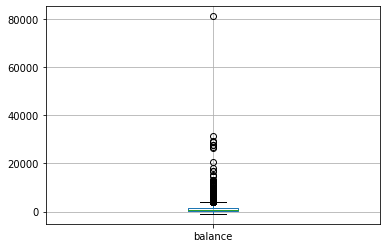

In [19]:
df.boxplot(column=['balance'])
plt.show()

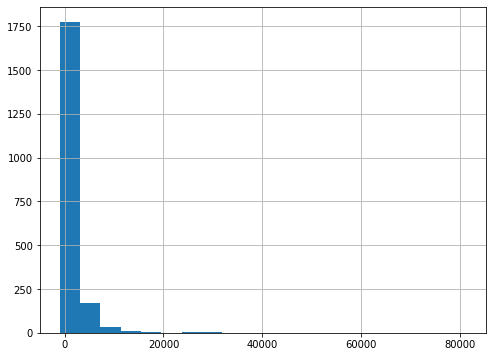

In [20]:
# A histogram of the attribute balance
plt.figure(figsize=(8,6))
df['balance'].hist(bins=20)
plt.show()

The histogram is skewed to the left, which is not ideal, and the `balance` attribute contains some extreme values. 

Let's find the minimum and maximum values in the `balance` column.

In [21]:
df[['balance']].min()

balance   -980
dtype: int64

The minimum `balance` is -980.

In [22]:
df[['balance']].max()

balance    81204
dtype: int64

The maximum `balance` is 81204.

#### The age attribute

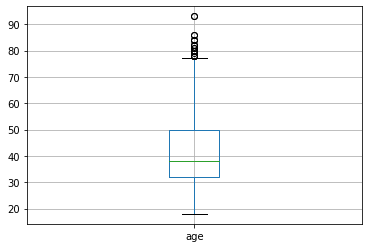

In [23]:
df.boxplot(column=['age'])
plt.show()

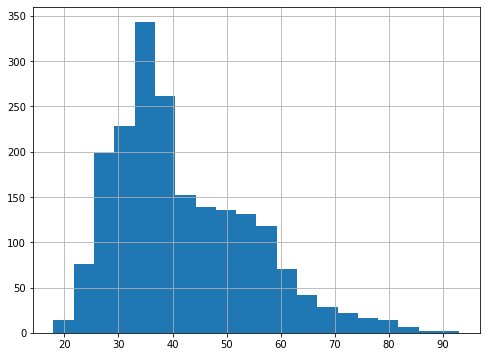

In [24]:
# A histogram of the attribute age
plt.figure(figsize=(8,6))
df['age'].hist(bins=20)
plt.show()

The histogram is skewed, and the `age` attribute contains some extreme values. 

Let's find the minimum and maximum values in the `age` column.

In [25]:
df[['age']].min()

age    18.0
dtype: float64

The minimum `age` is 18.

In [26]:
df[['age']].max()

age    93.0
dtype: float64

The maximum `age` is 93.

#### The duration attribute

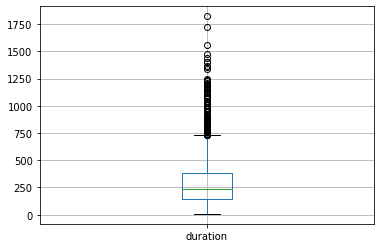

In [27]:
df.boxplot(column=['duration'])
plt.show()

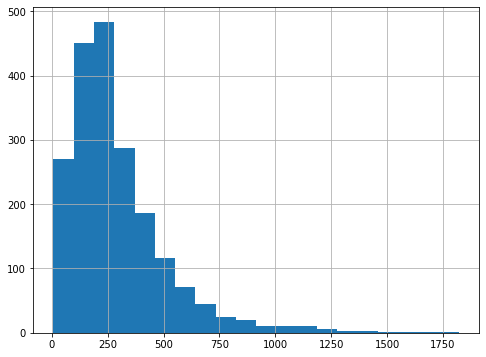

In [28]:
# A histogram of the attribute duration
plt.figure(figsize=(8,6))
df['duration'].hist(bins=20)
plt.show()

The histogram is skewed, and the `duration` attribute contains some extreme values. 

Let's find the minimum and maximum values in the `duration` column.

In [29]:
df[['duration']].min()

duration    7
dtype: int64

The minimum `duration` is 7.

In [30]:
df[['duration']].max()

duration    1823
dtype: int64

The maximum `duration` is 1823.

#### Applying the RobustScaler

The `RobustScaler`, which transforms each value in a column by subtracting the median from it and then dividing by the interquartile range, is a suitable scaling technique in the presence of outliers.

In [31]:
robust_scaler = RobustScaler()
df[['age','balance', 'duration']] = robust_scaler.fit_transform(df[['age','balance', 'duration']])

df.tail()

,age,education,balance,day,month,duration,campaign,pdays,previous,subscribed,...,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes
1995,-1.000000,2.0,1.548164,16,9,0.390558,2,-1,0,1,...,0,0,0,0,1,0,1,0,0,0
1996,-0.555556,2.0,-0.293832,16,9,4.712446,2,-1,0,1,...,0,0,0,0,1,0,1,0,0,0
1997,2.388889,1.0,0.417879,17,9,-0.021459,1,-1,0,1,...,1,0,0,0,1,1,0,0,0,0
1998,0.444444,1.0,2.627859,20,9,-0.218884,1,-1,0,1,...,0,1,0,0,1,1,0,0,1,0
1999,0.111111,2.0,4.055440,22,9,-0.120172,2,-1,0,1,...,0,0,0,0,1,1,0,0,0,0


## 9. Treatment of Outliers

We have determined that the attributes `balance`, `age` and `duration` contain some extreme values. 

We can check the box plots of `balance`, `age` and `duration` to verify that they have outliers.

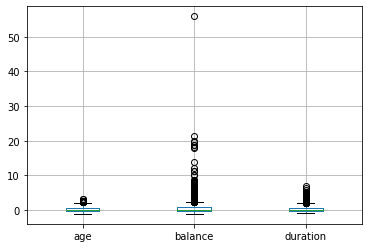

In [32]:
df.boxplot(column=['age','balance', 'duration'])
plt.show()

We can also examine the histograms of `balance`, `age` and `duration` after we have rescaled them.

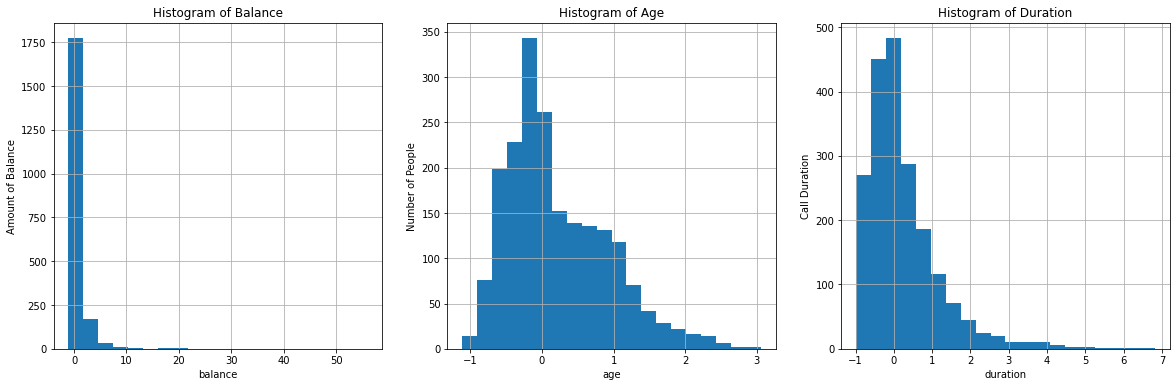

In [33]:
# Create figure with three subplots
fig = plt.figure(figsize=(20,6))

# Plot balance
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("Histogram of Balance")
ax1.set_xlabel('balance')
ax1.set_ylabel('Amount of Balance')
df['balance'].hist(bins=20)

# Plot age
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title("Histogram of Age")
ax2.set_xlabel('age')
ax2.set_ylabel('Number of People')
df['age'].hist(bins=20)

# Plot duration
ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title("Histogram of Duration")
ax3.set_xlabel('duration')
ax3.set_ylabel('Call Duration')
df['duration'].hist(bins=20)

plt.show()

Histograms are skewed to the left, which is not ideal because many machine learning algorithms work best when the features are not skewed to either side.

Finally, before treating the outliers, we determine the minimum values in these columns.

In [34]:
df[['balance', 'age', 'duration']].min()

balance    -1.060984
age        -1.111111
duration   -0.982833
dtype: float64

The extreme values are possible in all three columns so instead of ignoring the data rows with extreme values, we can transform them to reduce the negative impact of outliers on machine learning models. 

Here, we apply a log transformation. Since we have negative values in all three columns after rescaling, we add a constant to all values so that we can shift them to a positive range - the interval [1,+∞] - before applying a log transformation. 

In [35]:
# Use a log transformation to decrease the impact of outliers

df['balance'] = np.log(df['balance']+2.1)
df['age'] = np.log(df['age']+2.1)
df['duration'] = np.log(df['duration']+2.0)

We examine the plots again.

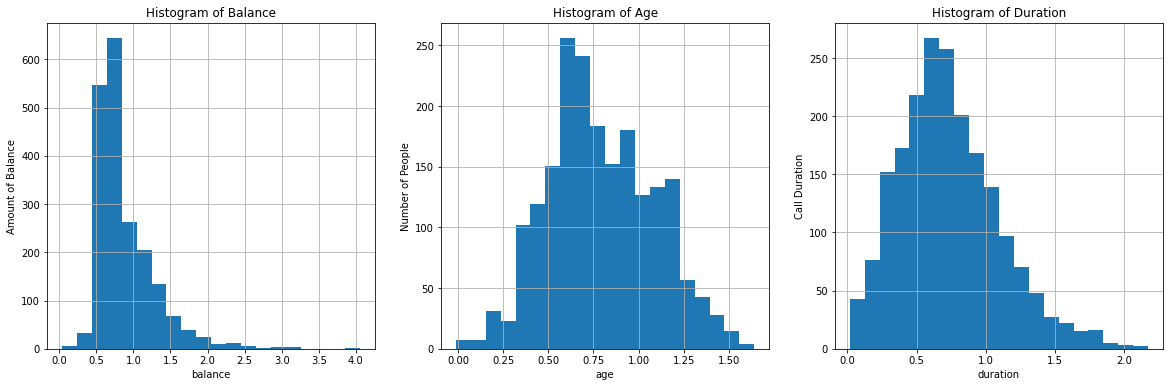

In [36]:
# Create figure with three subplots
fig = plt.figure(figsize=(20,6))

# Plot balance
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("Histogram of Balance")
ax1.set_xlabel('balance')
ax1.set_ylabel('Amount of Balance')
df['balance'].hist(bins=20)

# Plot age
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title("Histogram of Age")
ax2.set_xlabel('age')
ax2.set_ylabel('Number of People')
df['age'].hist(bins=20)

# Plot duration
ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title("Histogram of Duration")
ax3.set_xlabel('duration')
ax3.set_ylabel('Call Duration')
df['duration'].hist(bins=20)

plt.show()

The histograms show that the transformed features are less skewed and have distributions closer to normal than the original features `balance`, `age` `duration`.

## 10. Creation of Derived Features

The attribute `pdays` contains many values of __-1__, which indicate that there has been no previous contact with a customer. __-1__ here denotes missing values which should not be imputed since they are missing for a reason. 

In [37]:
df['pdays'].value_counts()

-1      454
 182     68
 181     62
 92      51
 91      41
       ... 
 277      1
 529      1
 532      1
 535      1
 854      1
Name: pdays, Length: 363, dtype: int64

__454__ have not been previously contacted.

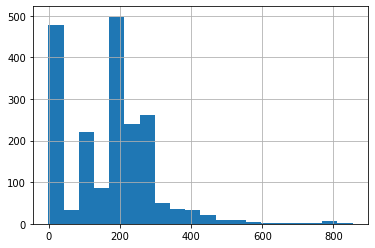

In [38]:
df['pdays'].hist(bins=20)
plt.show()

We can also examine the histogram of the attribute `pdays`.

We can create a new feature `contacted` with possible values 1 (`yes`) and 0 (`no`), which would indicate whether a particular customer has been previously contacted regarding a subscription of a term deposit. Right now we have to look at the `pdays` attribute to determine that, which is not ideal.

We know that all customers with a value of -1 in the `pdays` column have not been previously contacted. Therefore, we could set the value of the `contacted` to:
- 0 for all customers with a pdays value of -1. 
- 1 for all customers with a pdays value other than -1. 

In [39]:
df['contacted'] = df_original['pdays']

Now we have to replace all data rows containing -1 with the value 1, and all other data rows with the value 0.

In [40]:
df['contacted'] = np.where(df.contacted == -1, 0, df.contacted)
df['contacted'] = np.where(df.contacted > 0, 1, df.contacted)

In [41]:
df['contacted'].value_counts()

1    1546
0     454
Name: contacted, dtype: int64

We have __454__ customers who have not been previously contacted regarding a subscription of a term deposit, and __1546__ customers who have been contacted.

## 11. Save the Prepared Dataset

Finally, we save the prepared dataset as a CSV file.

In [42]:
df.to_csv('bank_prepared.csv')

## References

Brownlee, J. (2019) Machine Learning Mastery with Python: Understand Your Data, Create Accurate Models and Work Projects End-To-End, e-book, Independently published.


McKinney, W. (2018) Python for Data Analysis, 2nd ed., Sebastopol: O'Reilly Media.